In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline

def load_data():
    url = 'http://43.202.66.118:8077/all'
    r = requests.get(url)
    d = r.json()
    return d

data = load_data()
df = pd.DataFrame(data)

In [4]:
df.head(10)

,num,file_name,label,file_path,request_time,request_user,prediction_model,prediction_result,prediction_time
0,1,7_25452.png,,/home/ubuntu/images/n11/0bacd2a5-d393-4152-a50...,2024-09-25 10:30:38,n11,n01,6,2024-09-25 10:31:01
1,2,7_25452.png,,/home/ubuntu/images/n11/4410feba-fde6-4107-81c...,2024-09-25 10:30:39,n11,randint,8,2024-09-25 10:31:01
2,3,7_25452.png,,/home/ubuntu/images/n11/e238684e-3caa-4417-aba...,2024-09-25 10:30:39,n11,n77,5,2024-09-25 10:31:02
3,4,7_25452.png,,/home/ubuntu/images/n11/db967479-5ffc-492b-b92...,2024-09-25 10:30:39,n11,n04,7,2024-09-25 10:31:02
4,5,7_25452.png,,/home/ubuntu/images/n11/59fc767d-3834-4b31-857...,2024-09-25 10:30:39,n11,mnist240924.keras,8,2024-09-25 10:31:05
5,6,001.png,,/home/ubuntu/images/n08/6b3e0607-4b7c-4603-a9d...,2024-09-25 10:35:11,n08,mnist240924.keras,0,2024-09-25 10:35:25
6,7,001.png,,/home/ubuntu/images/n08/e2d4347c-e4f8-4e7d-9b9...,2024-09-25 10:35:11,n08,model3.pkl,3,2024-09-25 10:36:01
7,8,001.png,,/home/ubuntu/images/n08/64f807e9-1fc6-412f-9d3...,2024-09-25 10:35:12,n08,n01,1,2024-09-25 10:36:01
8,9,001.png,,/home/ubuntu/images/n08/0ce10895-8149-48bc-b51...,2024-09-25 10:35:12,n08,n77,6,2024-09-25 10:36:02
9,10,001.png,,/home/ubuntu/images/n08/18556a52-6d13-4032-9cd...,2024-09-25 10:35:12,n08,randint,3,2024-09-25 10:36:02


In [9]:
# request_time 컬럼을 datetime 형식으로 변환
df['request_time'] = pd.to_datetime(df['request_time'])
# 시간별 그룹화를 위해 'request_time' 시간(h) 추출
df['h_time'] = df['request_time'].dt.strftime('%Y-%m-%d %H')
# 시간별 요청 횟수 그룹화
h_counts = df.groupby('h_time').count()

TypeError: 'Axes' object is not iterable

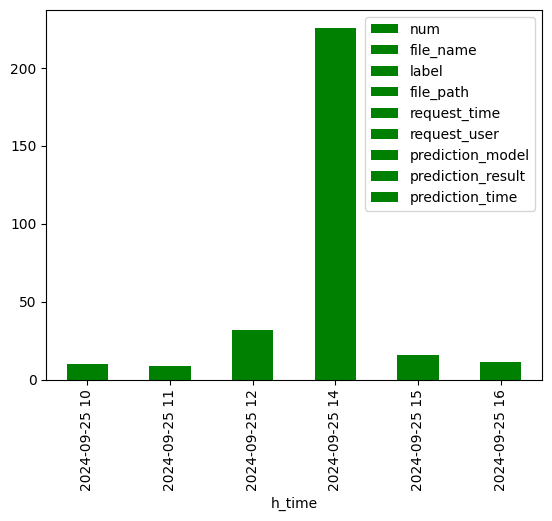

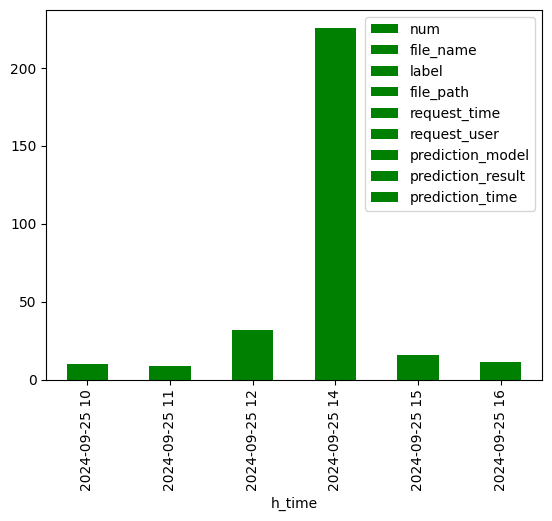

In [14]:
h_counts.plot(kind='bar', color='green')
bar = h_counts.plot(kind='bar', color='green')
#h_counts.plot(kind='line', color='orrange')

# 값 넣는 부분  
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 12)
    
plt.title('Number of Requests by Hour')
plt.xlabel('Date time')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
#plt.tight_layout()

plt.show()